In [1]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
#this function generates the BA scale free graph and returns how the max degree increased trough time
#parametrs: t=time, m0 initial node number (FC), m number of links for every node 
#returns: max_degrees
def get_SF_maxdegree(t, m=2, m0=2):
    #degree dict
    degrees = {}
    #max degree node in t
    mdn = 0
    #max degree in t
    md  = m0-1
    # contains the nodes as many times as it's degree
    nodeList = []
    # max degrees
    max_degrees = []
    #initialize the FC graph at t=0
    for i in range(m0):
        # connecting the node with all of the other nodes
        #edges[i] = set([j for j in range(m0) if i!=j])
        # adding the i node to nodeList as many times as it's degree
        nodeList.extend([i]*m0)
        degrees[i] = m0
    #iterating trough time, time step also used as node index
    #but I already have 0,..., m0 nodes, so I shift the loop
    for i in range(m0,t+m0):
        #selected nodes: this nodes will be connected to the new node
        selected_nodes = []
        #we try to select node until we have selected m node
        while len(selected_nodes)!=m:
            # selecting a node, nodeList contains a node as many times as it's degree. 
            # So the probability of selecting node is propto it's degree.
            sn = nodeList[rnd.randint(0, len(nodeList)-1)]
            # if we already selected this node, we don't select it again, 
            # because we can't connect multiple times the same two node
            if sn not in selected_nodes:
                # adding the selected node to the selected_nodes list
                selected_nodes.append(sn)
                # if sn is the max degree node, then de max degree is increased now with 1
                if sn==mdn:
                    md += 1
                degrees[sn] += 1
                # if the new node degree is bigger then md then we have a new max degree node
                if degrees[sn]>md:
                    md  = degrees[sn]
                    mdn = sn
        # adding the selected nodes to nodeList
        nodeList.extend(selected_nodes)
        # adding the new node to the nodeList as many times as it's degree, which is m
        nodeList.extend([i]*m)
        # adding the new node to degrees dict
        degrees[i] = m
        # if the new node degree's > max degree: we have a new max degree node
        if m>md:
            md  = m
            mdn = i
        max_degrees.append(md)
    return max_degrees

In [16]:
# getting the degree increase for t=10^6
degrees = get_SF_maxdegree(1000000)

In [17]:
# creating the time list
time = [i for i in range(len(degrees))]

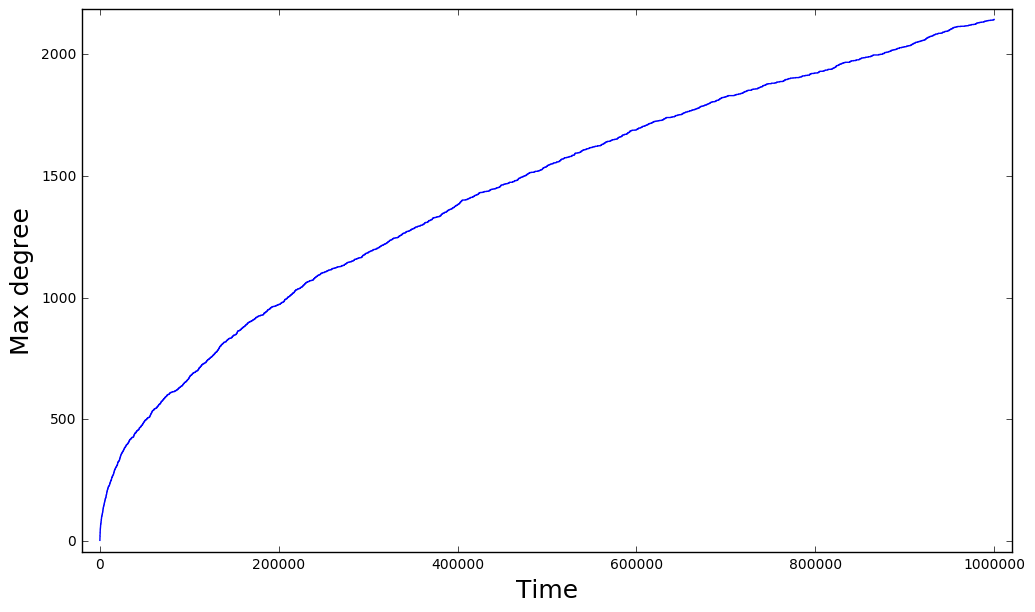

In [31]:
#plot
plt.figure(0, (12,7))
plt.xlim([-max(time)*0.02, max(time)*1.02])
plt.ylim([-max(degrees)*0.02, max(degrees)*1.02])
plt.xlabel("Time", fontsize=18)
plt.ylabel("Max degree", fontsize=18)
plt.plot(time, degrees)